# Titanic Survivors

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Getting datasets

In [2]:
test_df=pd.read_csv("test.csv")
train_df=pd.read_csv("train.csv")

In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
test_df.shape

(418, 11)

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
test_df.describe().sum()

PassengerId    7141.810458
Pclass          432.107388
Age             539.623800
SibSp           428.344128
Parch           428.373773
Fare           1074.713965
dtype: float64

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
train_df.shape

(891, 12)

In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train_df.describe().sum()

PassengerId    3824.353842
Survived        893.870431
Pclass          906.144713
Age             924.770615
SibSp           901.625751
Parch           898.187651
Fare           1538.591437
dtype: float64

# Data Cleaning 

In [15]:
#Fixing the columns for better analysis
train_df.rename(columns={'PassengerId': 'id', 'Survived': 'survived', 
                   'Pclass': 'class', 'Name': 'name', 'Sex': 'sex', 
                   'Age': 'age', 'SibSp': 'sibling_spouse', 'Parch': 'parent_children', 'Ticket': 'ticket', 
                   'Fare': 'fare', 'Cabin': 'cabin', 'Embarked': 'embarked'}, inplace=True)

In [16]:
test_df.rename(columns={'PassengerId': 'id', 'Survived': 'survived', 
                   'Pclass': 'class', 'Name': 'name', 'Sex': 'sex', 
                   'Age': 'age', 'SibSp': 'sibling_spouse', 'Parch': 'parent_children', 'Ticket': 'ticket', 
                   'Fare': 'fare', 'Cabin': 'cabin', 'Embarked': 'embarked'}, inplace=True)

In [17]:
train_df.head()

,id,survived,class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
test_df.head()

,id,class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
test_df.isnull().sum()

id                   0
class                0
name                 0
sex                  0
age                 86
sibling_spouse       0
parent_children      0
ticket               0
fare                 1
cabin              327
embarked             0
dtype: int64

In [20]:
test_df.isnull().sum()/test_df.shape[0]*100

id                  0.000000
class               0.000000
name                0.000000
sex                 0.000000
age                20.574163
sibling_spouse      0.000000
parent_children     0.000000
ticket              0.000000
fare                0.239234
cabin              78.229665
embarked            0.000000
dtype: float64

In [21]:
test_df.duplicated().sum()

0

In [22]:
for i in test_df.select_dtypes(include="object").columns:
    print(test_df[i].value_counts())
    print("***"*10)

name
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: count, Length: 418, dtype: int64
******************************
sex
male      266
female    152
Name: count, dtype: int64
******************************
ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64
******************************
cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name:

In [23]:
train_df.isnull().sum()

id                   0
survived             0
class                0
name                 0
sex                  0
age                177
sibling_spouse       0
parent_children      0
ticket               0
fare                 0
cabin              687
embarked             2
dtype: int64

In [24]:
train_df.isnull().sum()/test_df.shape[0]*100

id                   0.000000
survived             0.000000
class                0.000000
name                 0.000000
sex                  0.000000
age                 42.344498
sibling_spouse       0.000000
parent_children      0.000000
ticket               0.000000
fare                 0.000000
cabin              164.354067
embarked             0.478469
dtype: float64

In [25]:
train_df.duplicated().sum()

0

In [26]:
for i in train_df.select_dtypes(include="object").columns:
    print(train_df[i].value_counts())
    print("***"*10)

name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
******************************
sex
male      577
female    314
Name: count, dtype: int64
******************************
ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
******************************
cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
        

 # Exploratory Data Analysis

In [27]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
class,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
sibling_spouse,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
parent_children,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [28]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
class,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibling_spouse,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parent_children,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [29]:
test_df.describe(include="object")

,name,sex,ticket,cabin,embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [30]:
train_df.describe(include="object")

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


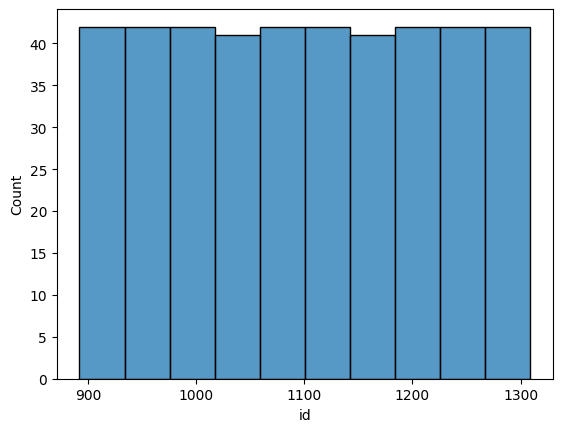

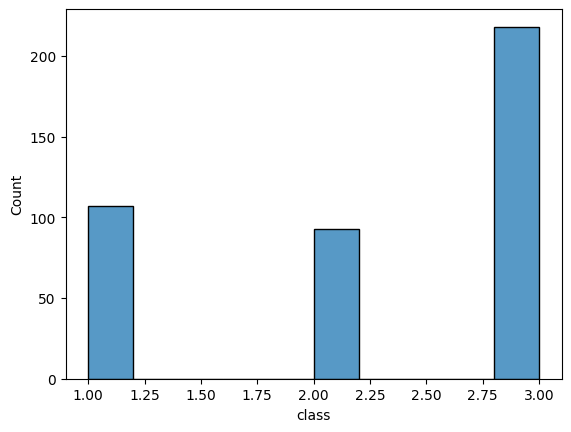

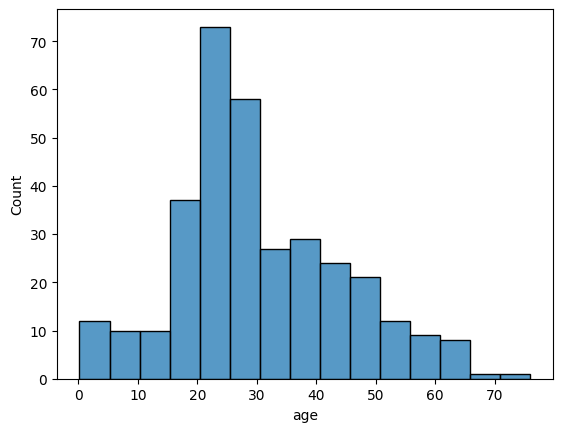

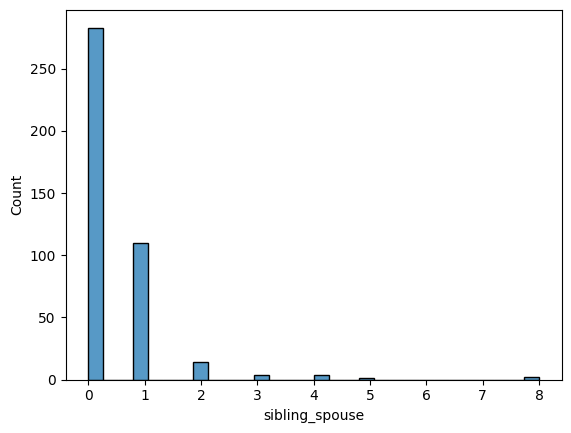

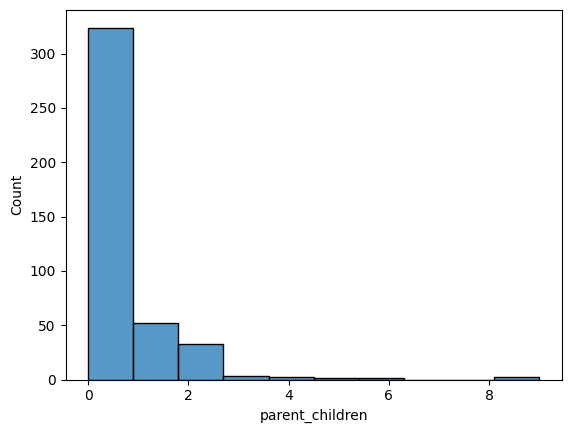

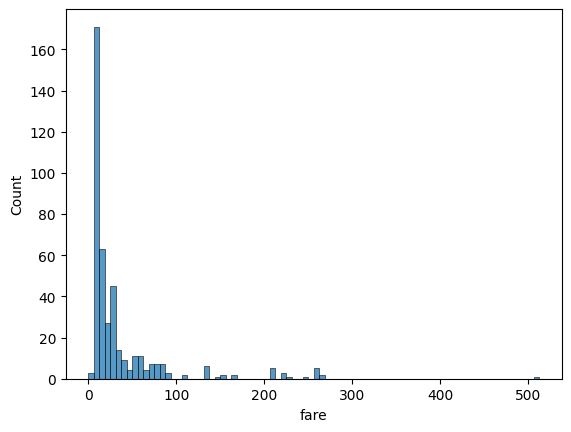

In [31]:
import warnings
warnings.filterwarnings("ignore")
for i in test_df.select_dtypes(include="number").columns:
    sns.histplot(data=test_df, x=i)
    plt.show()

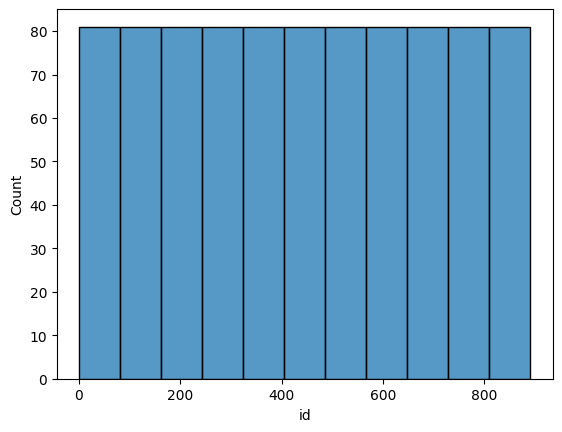

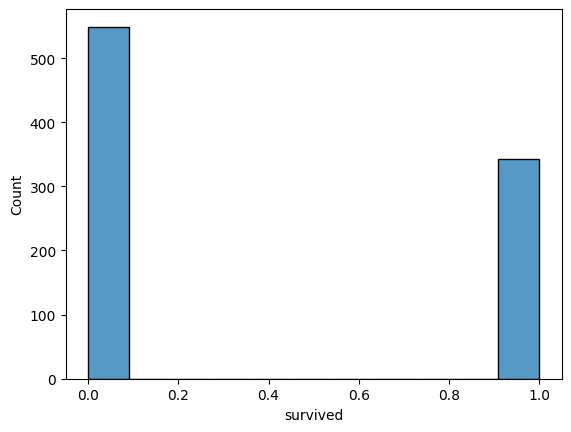

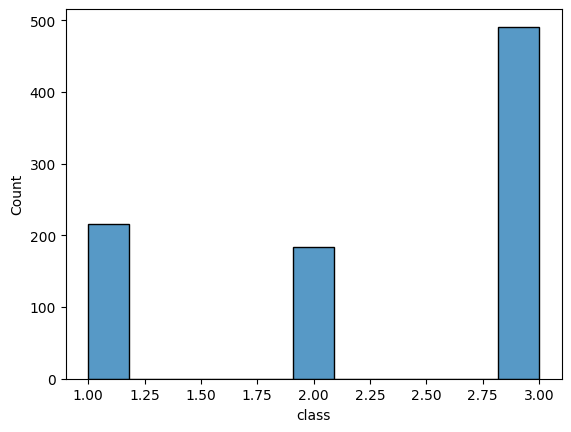

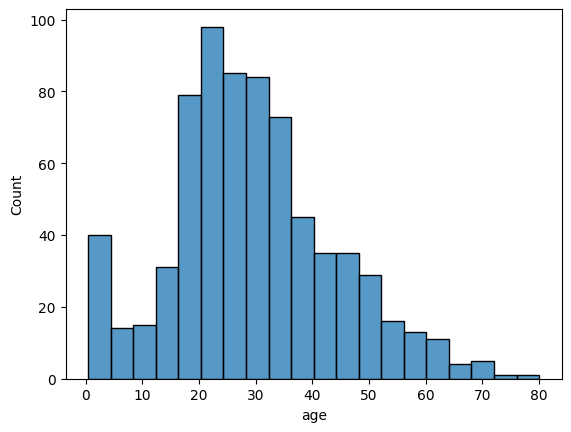

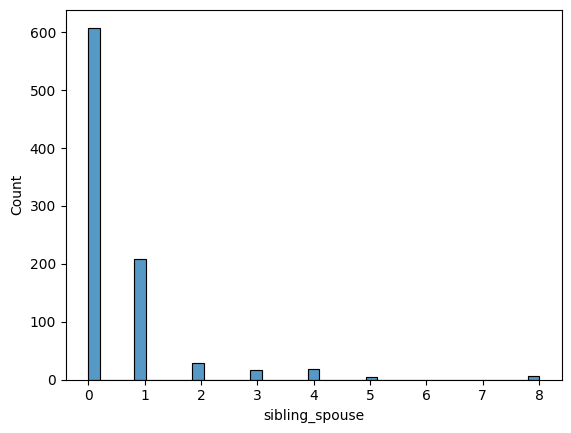

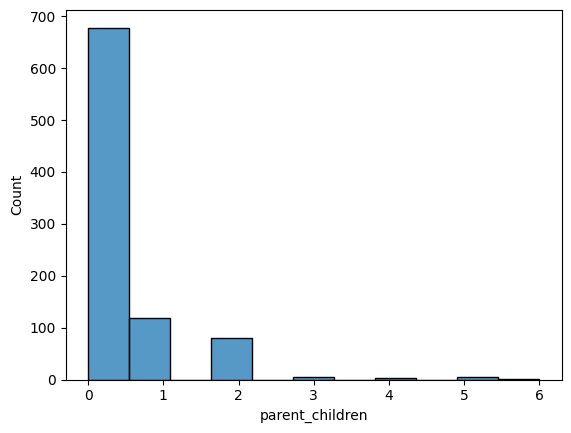

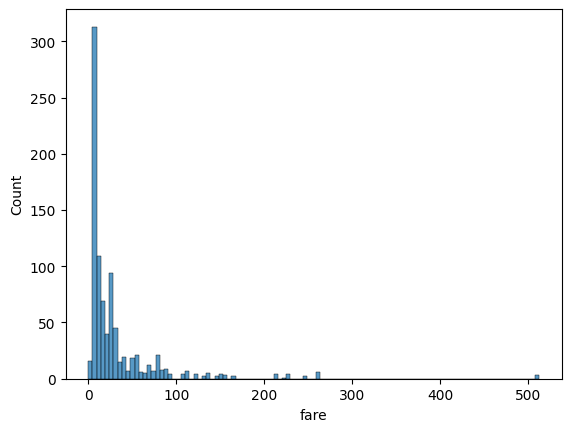

In [32]:
import warnings
warnings.filterwarnings("ignore")
for i in train_df.select_dtypes(include="number").columns:
    sns.histplot(data=train_df, x=i)
    plt.show()

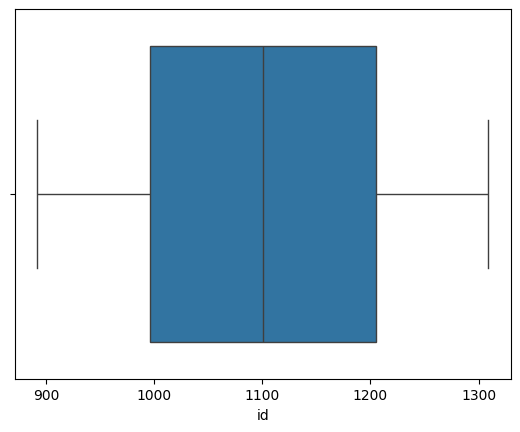

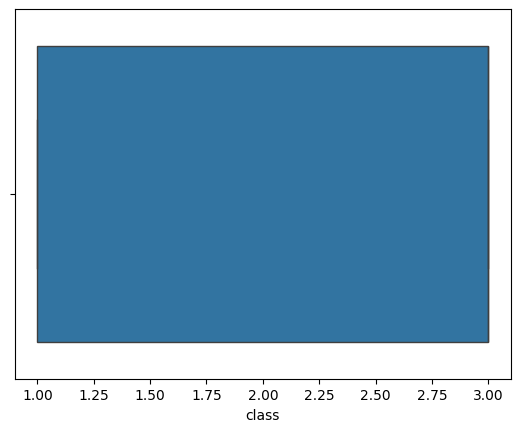

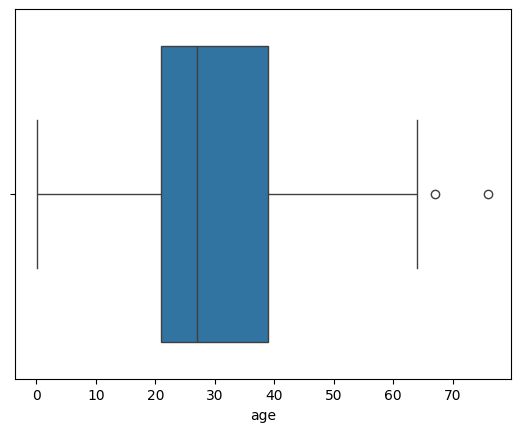

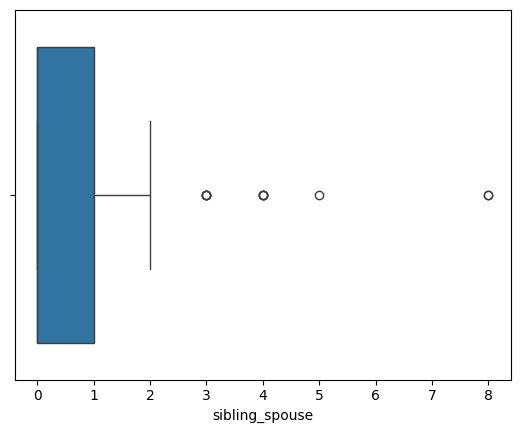

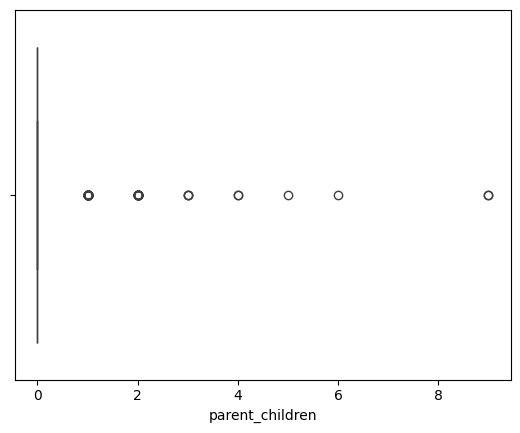

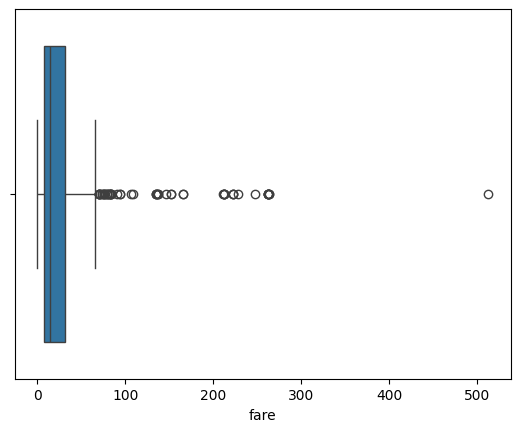

In [33]:
# Identifying outliers 
for i in test_df.select_dtypes(include="number").columns:
    sns.boxplot(data=test_df, x=i)
    plt.show()

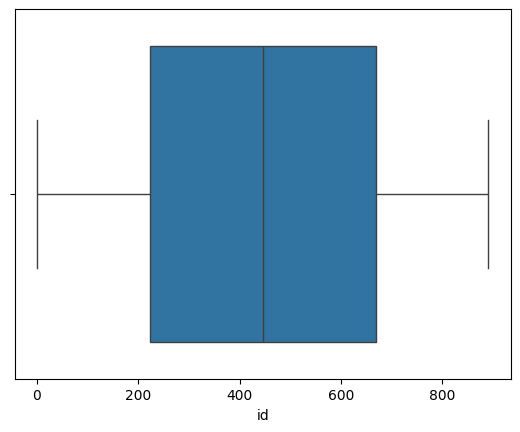

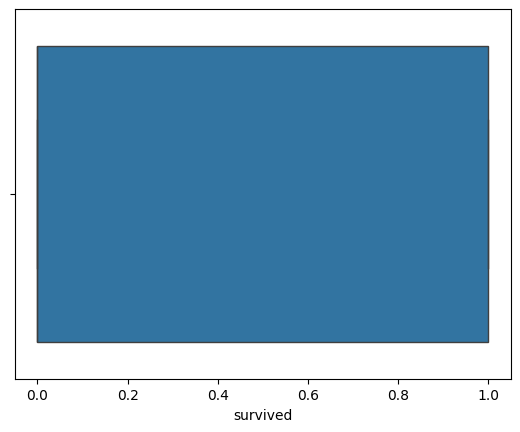

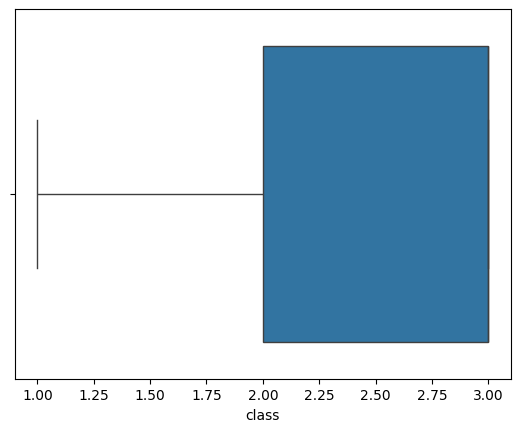

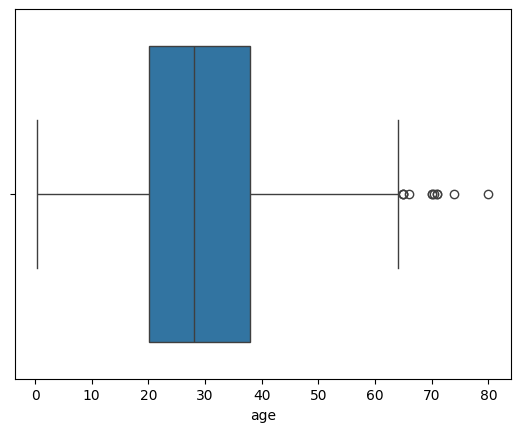

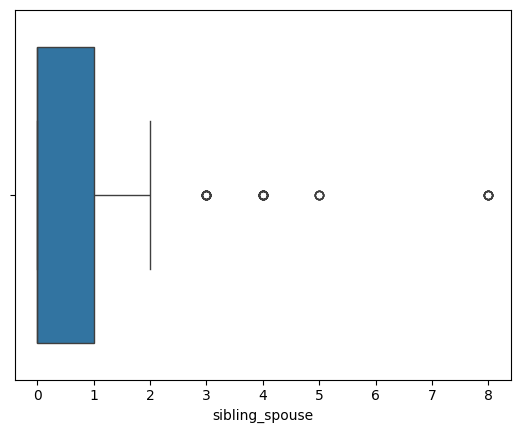

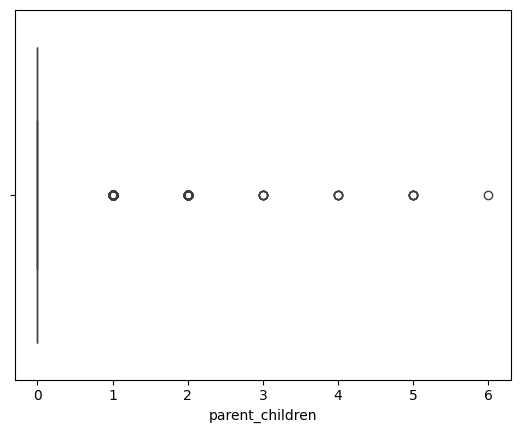

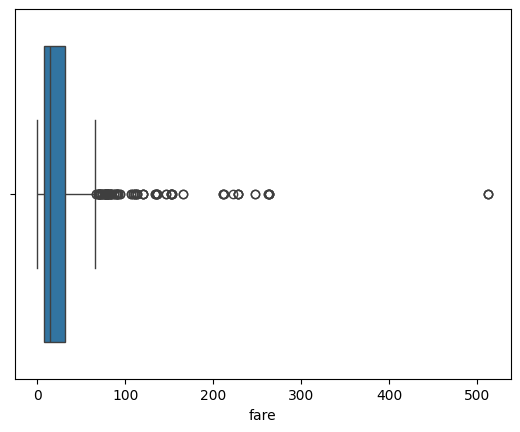

In [34]:
for i in train_df.select_dtypes(include="number").columns:
    sns.boxplot(data=train_df, x=i)
    plt.show()

In [35]:
# Scatter plot to identify the relationship
test_df.select_dtypes(include="number").columns


Index(['id', 'class', 'age', 'sibling_spouse', 'parent_children', 'fare'], dtype='object')

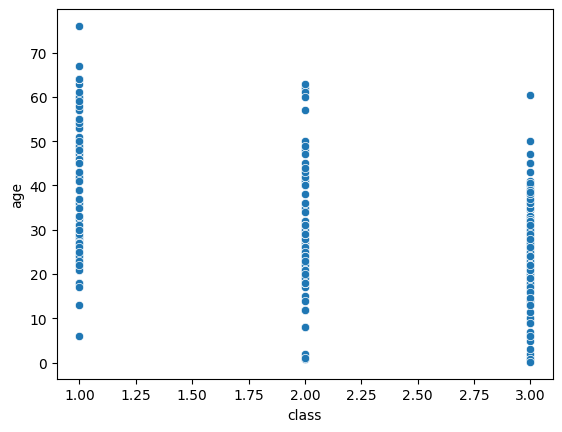

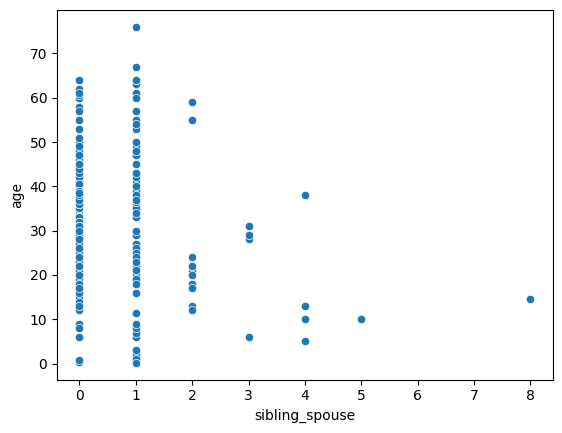

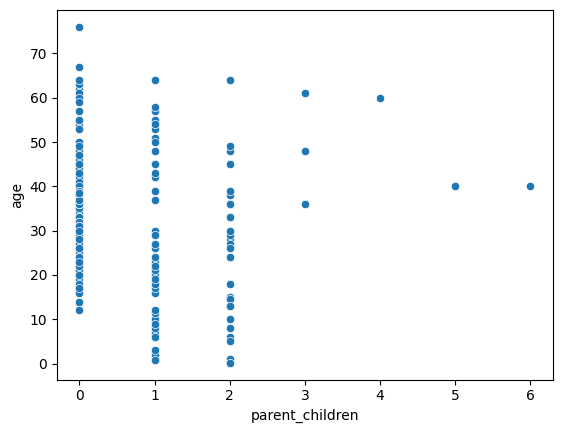

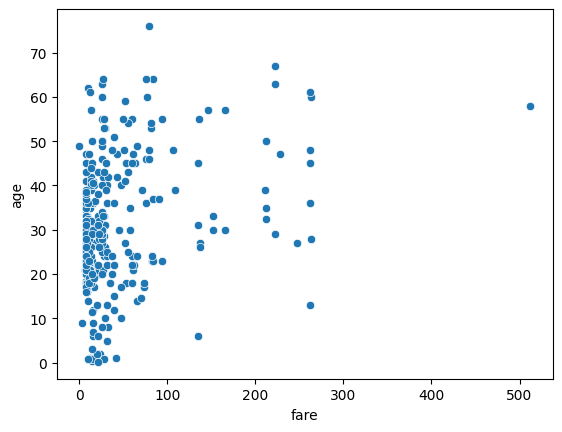

In [36]:
for i in [ 'class', 'sibling_spouse', 'parent_children','fare']:
    sns.scatterplot(data=test_df,x=i, y='age')
    plt.show()
    

In [37]:
train_df.select_dtypes(include="number").columns

Index(['id', 'survived', 'class', 'age', 'sibling_spouse', 'parent_children',
       'fare'],
      dtype='object')

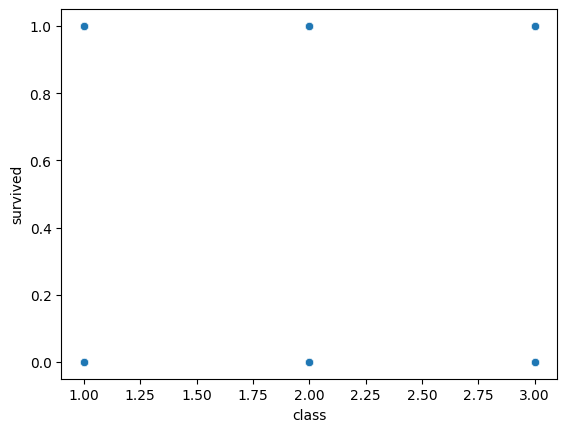

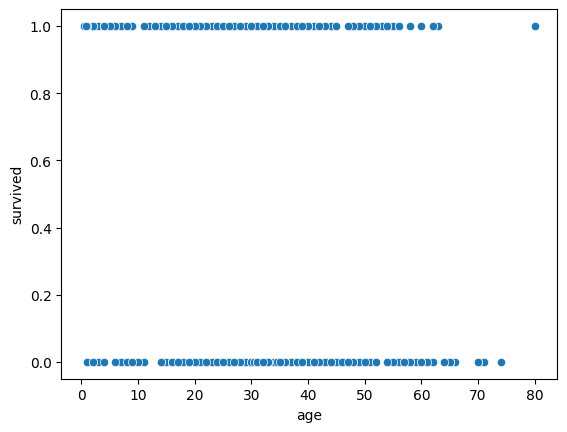

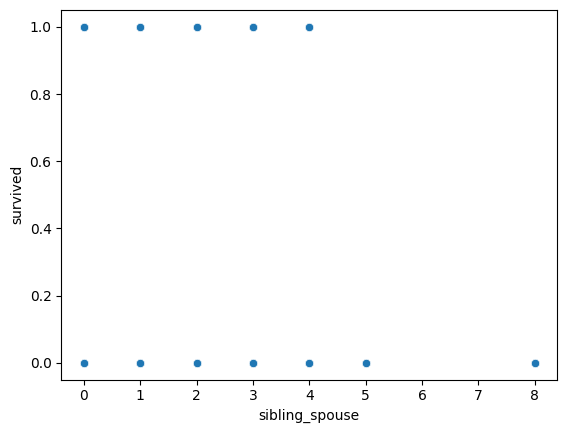

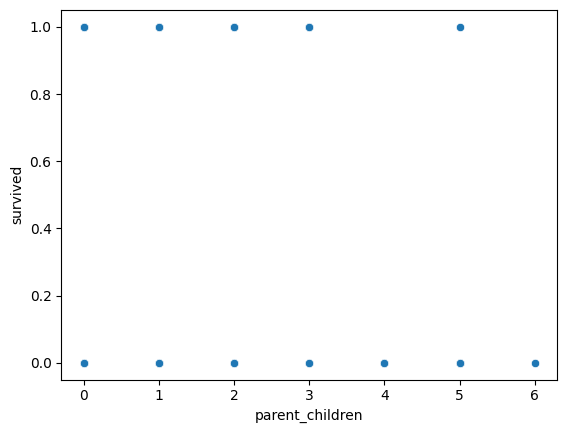

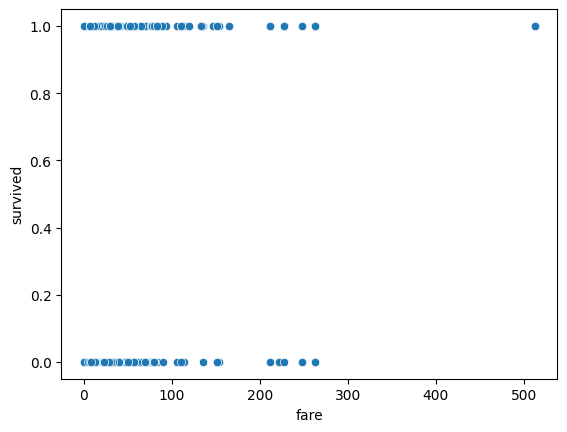

In [38]:
for i in ['class', 'age', 'sibling_spouse', 'parent_children',
       'fare']:
    sns.scatterplot(data=train_df,x=i, y='survived')
    plt.show()

In [39]:
#Correlation with heatmap to interpret the relation and multicolliniarity
t=test_df.select_dtypes(include="number").corr()
t=train_df.select_dtypes(include="number").corr()

<Axes: >

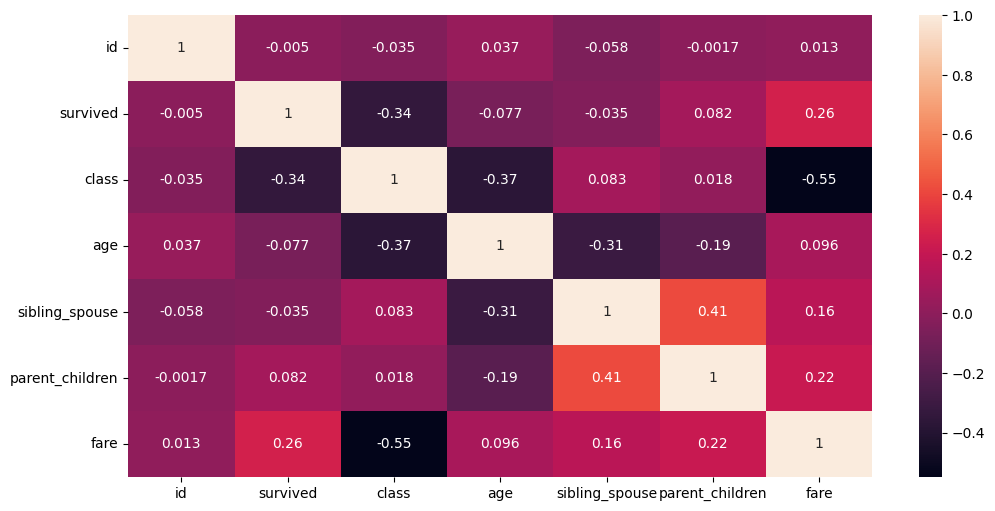

In [40]:
plt.figure(figsize=(12, 6))
sns.heatmap(t,annot=True)

In [41]:
# Dealing with missing data
age_median = train_df['age'].median()
print(age_median)


28.0


In [42]:
 train_df['age'] =  train_df['age'].fillna(age_median)
 train_df['embarked'] =  train_df['embarked'].fillna('S')

In [43]:
train_df['class'].unique()

array([3, 1, 2], dtype=int64)

[Text(0, 0, '3rd'), Text(1, 0, '2nd'), Text(2, 0, '1st')]

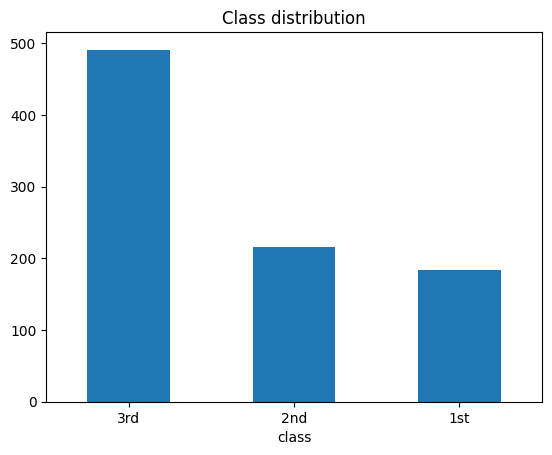

In [44]:
ax =train_df['class'].value_counts().plot(kind = 'bar')
plt.title('Class distribution')
ax.set_xticklabels(['3rd', '2nd', '1st'], rotation = 0)

Showing the survival distribution with classes

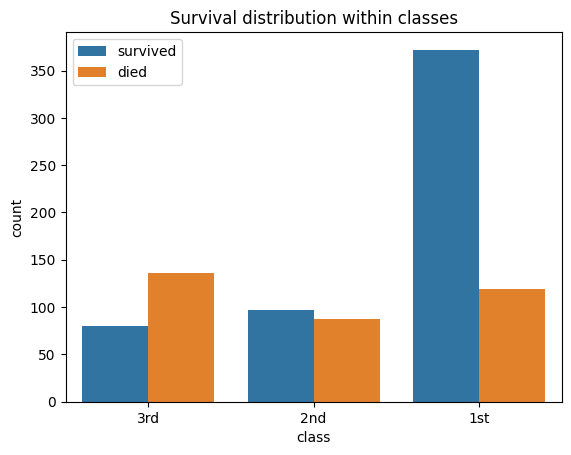

In [45]:
 ax = sns.countplot(x=train_df['class'], hue=train_df['survived'])
plt.title('Survival distribution within classes')
ax.set_xticklabels(['3rd', '2nd', '1st'], rotation = 0)
plt.legend(labels=['survived', 'died'])

Counting percentage of survival within classes

In [46]:
train_df.groupby('class').survived.value_counts(normalize=True).sort_index()

class  survived
1      0           0.370370
       1           0.629630
2      0           0.527174
       1           0.472826
3      0           0.757637
       1           0.242363
Name: proportion, dtype: float64

THe graph above show that first class had a highest chance of survival with 62.96% than there other two classes with 3rd class having the lowest survival rate at 24.23%

In [47]:
train_df['sex'].unique()

array(['male', 'female'], dtype=object)

<Axes: title={'center': 'Sex distribution'}, ylabel='count'>

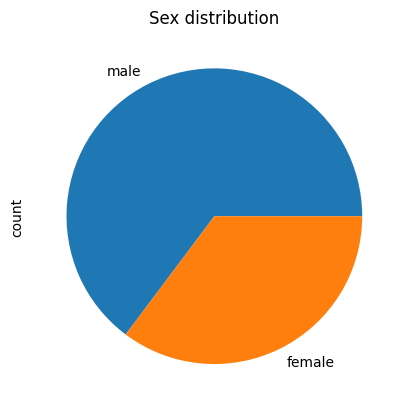

In [48]:
plt.title('Sex distribution')
train_df['sex'].value_counts().plot(kind='pie')

The pie chart above show the distribution of sex 

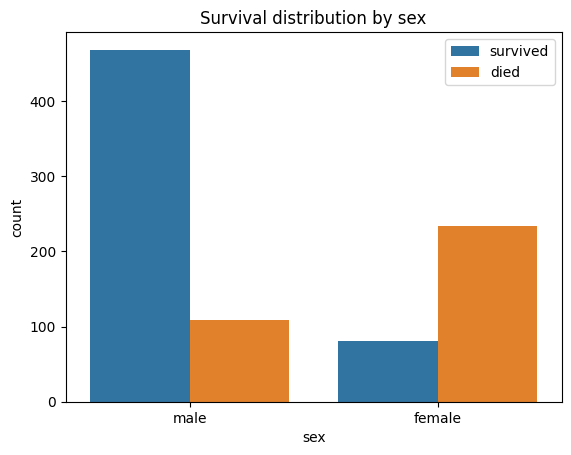

In [49]:
ax = sns.countplot(x=train_df['sex'], hue=train_df['survived'])
plt.title('Survival distribution by sex')
plt.legend(labels=['survived', 'died'])

The plot above shows that males had a high chance of survival than the females

In [50]:
train_df.groupby('sex').survived.value_counts(normalize=True).sort_index()

sex     survived
female  0           0.257962
        1           0.742038
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Survival ratio by passenger class and sex')

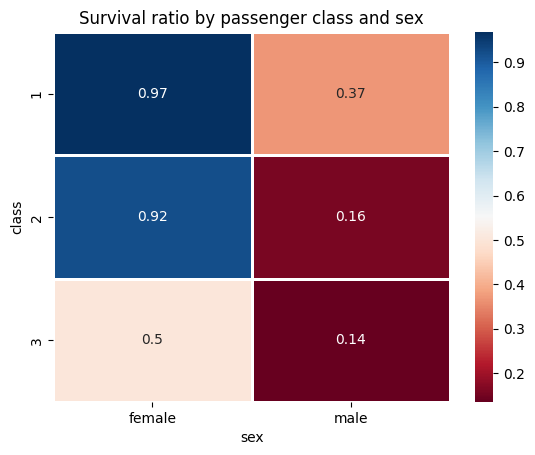

In [51]:
sns.heatmap(train_df.pivot_table(index='class', columns='sex', values='survived'),  linewidths=1, cmap='RdBu', linecolor='white', annot=True)
plt.title('Survival ratio by passenger class and sex')

From the heatmap above it shows that female at first class had the highest rate of survival at 97% , The man in the 3rd class had the lowest chances of survival at 14%. Females had a high rate of survival in all classes than male 

<Axes: title={'center': 'Age distribution'}, ylabel='Frequency'>

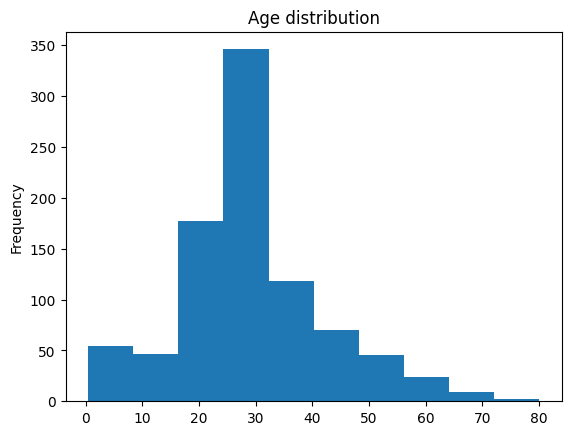

In [52]:
plt.title('Age distribution')
train_df['age'].plot(kind='hist')

The plot above shows the number of people between a certain age with the age between 25-35 being the most on board group age


Text(0.5, 1.0, 'Age distribution within classes')

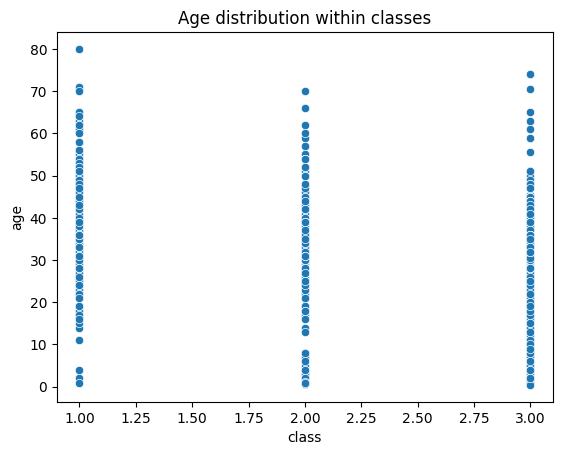

In [53]:
ax = sns.scatterplot(x='class', y='age', data=train_df)
plt.title('Age distribution within classes')

The plot show the age distribution amongst the classes

Text(0.5, 1.0, 'Age and sex distribution within classes')

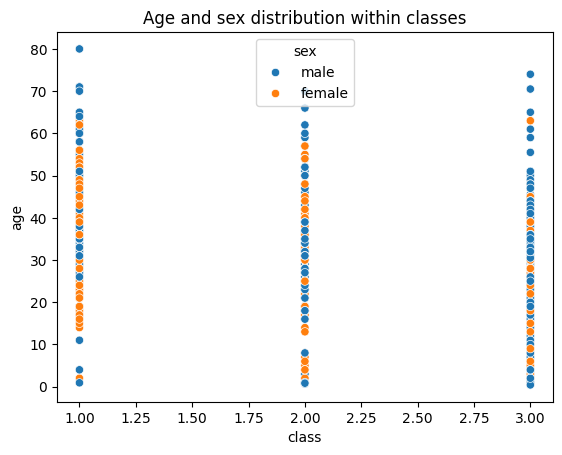

In [54]:
ax = sns.scatterplot(x='class', y='age', hue='sex', data=train_df)
plt.title('Age and sex distribution within classes')

The plot shows the distribution of age and sex in each class

[Text(0, 0, 'Died'), Text(1, 0, 'Survived')]

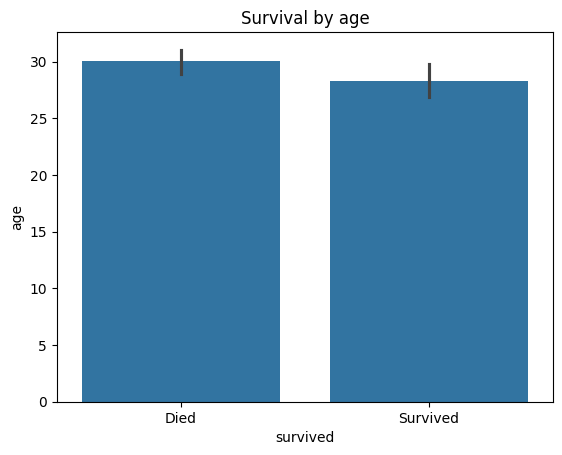

In [55]:
ax = sns.barplot(x='survived', y='age', data=train_df)
plt.title('Survival by age')
ax.set_xticklabels(['Died', 'Survived'])

[Text(0, 0, 'Southampton'), Text(1, 0, 'Cherbourg'), Text(2, 0, 'Queenstown')]

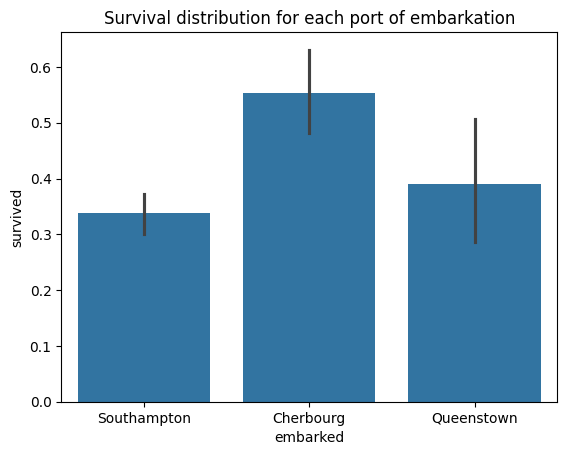

In [56]:
ax = sns.barplot(x='embarked', y='survived', data=train_df)
plt.title('Survival distribution for each port of embarkation')
ax.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'], rotation = 0)

From the above bar plot we can see that passengers embarked on Cherbourg had the highest survival rate and those embarked on Southampton the lowest.

Text(0.5, 1.0, 'Survival ratio by passenger class and port of embarkation')

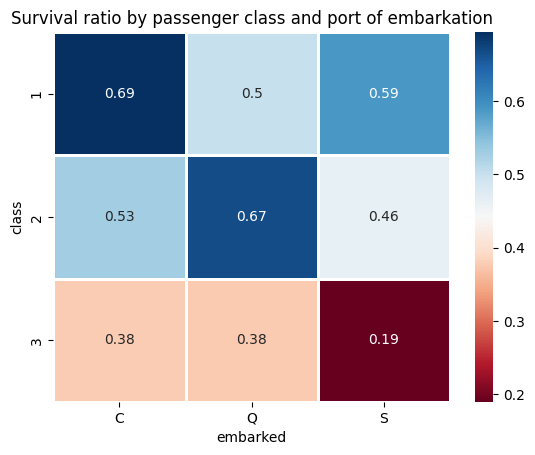

In [57]:
sns.heatmap(train_df.pivot_table(index='class', columns='embarked', values='survived'), linewidths=1, cmap='RdBu', linecolor='white', annot=True)
plt.title('Survival ratio by passenger class and port of embarkation')

In [105]:
The heatmap shows however that in the 2nd class passengers embarked on Queenstown had higher survival chance than those embarked on Cherbourg.

SyntaxError: invalid decimal literal (979353044.py, line 1)

Text(0.5, 1.0, 'Survival ratio by sex and port of embarkation')

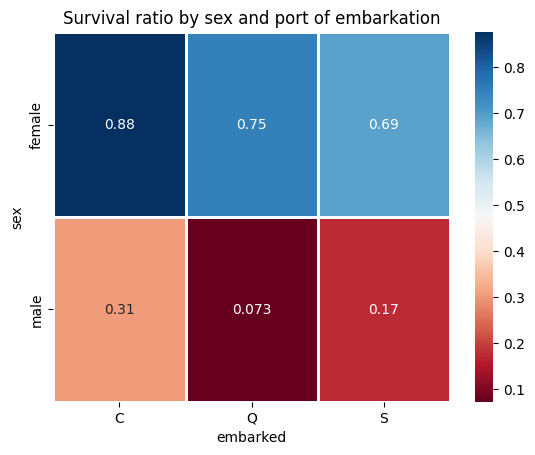

In [58]:
sns.heatmap(train_df.pivot_table(index='sex', columns='embarked', values='survived'), linewidths=1, cmap='RdBu', linecolor='white', annot=True)
plt.title('Survival ratio by sex and port of embarkation')

The heatmap shows however that in the 2nd class passengers embarked on Queenstown had higher survival chance than those embarked on Cherbourg.

<Axes: title={'center': 'Fare price distribution'}, ylabel='Frequency'>

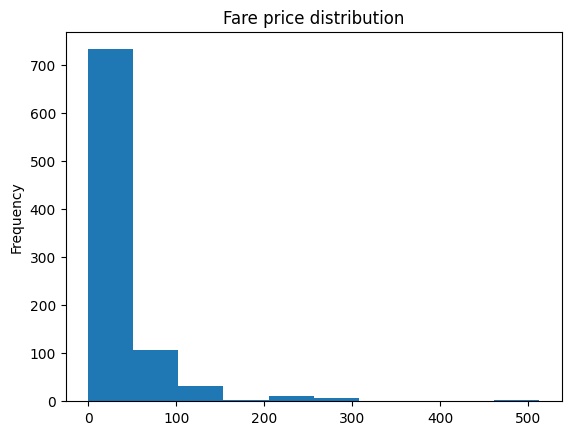

In [59]:
plt.title('Fare price distribution')
train_df['fare'].plot(kind='hist')

[Text(0, 0, 'Died'), Text(1, 0, 'Survived')]

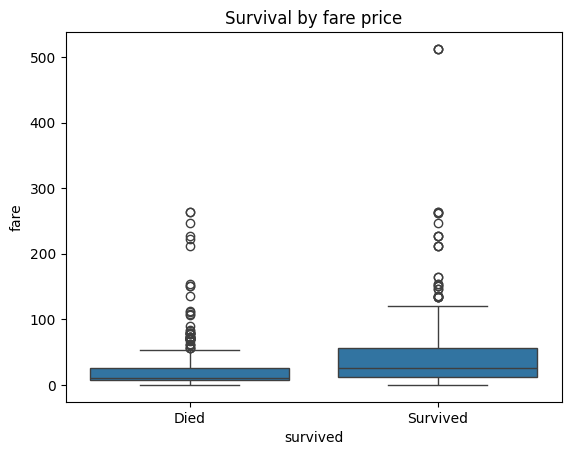

In [60]:
ax=sns.boxplot(x='survived', y='fare', data=train_df)
plt.title('Survival by fare price')
ax.set_xticklabels(['Died','Survived'], rotation=0)

Passengers with more expensive fare prices survived more often.

In [61]:

train_df.groupby('sibling_spouse').survived.value_counts(normalize=True).sort_index()

sibling_spouse  survived
0               0           0.654605
                1           0.345395
1               0           0.464115
                1           0.535885
2               0           0.535714
                1           0.464286
3               0           0.750000
                1           0.250000
4               0           0.833333
                1           0.166667
5               0           1.000000
8               0           1.000000
Name: proportion, dtype: float64


Showing graph of survival by number of siblings/spouses aboard the Titanic

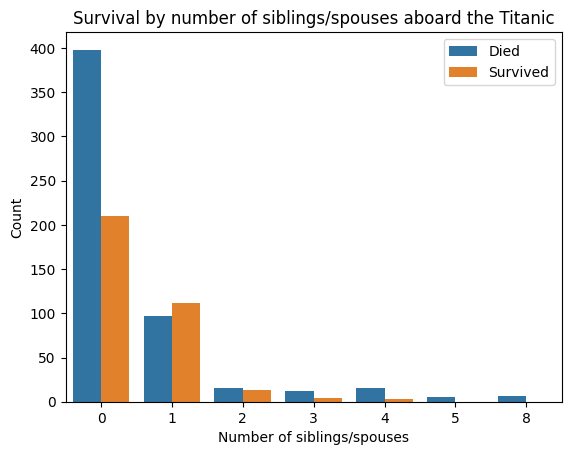

In [62]:
sns.countplot(x='sibling_spouse', hue='survived',data=train_df)
plt.ylabel('Count')
plt.xlabel('Number of siblings/spouses')
plt.title('Survival by number of siblings/spouses aboard the Titanic')
plt.legend(('Died', 'Survived'))

Text(0.5, 1.0, 'Survival ratio by sex and number of siblings/spouses')

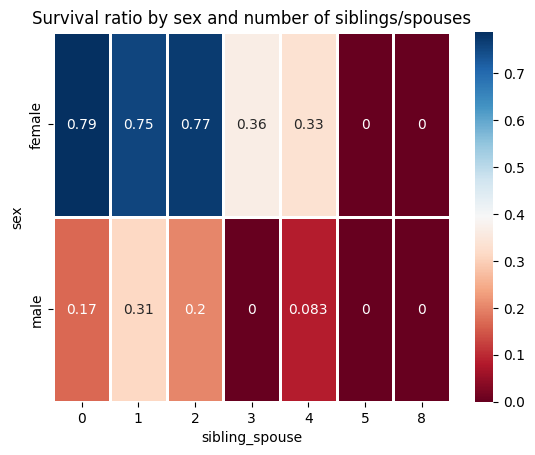

In [63]:
sns.heatmap(train_df.pivot_table(index='sex', columns='sibling_spouse', values='survived'), linewidths=1, cmap='RdBu', linecolor='white', annot=True)
plt.title('Survival ratio by sex and number of siblings/spouses')

Female passengers who had lower number of siblings/spouses (0, 1 or 2) had the highest survival chance. Regardless of sex, passengers with 5 or 8 siblings/spouses had no chance of survival at all.

In [64]:
train_df.groupby('parent_children').survived.value_counts(normalize=True).sort_index()

parent_children  survived
0                0           0.656342
                 1           0.343658
1                0           0.449153
                 1           0.550847
2                0           0.500000
                 1           0.500000
3                0           0.400000
                 1           0.600000
4                0           1.000000
5                0           0.800000
                 1           0.200000
6                0           1.000000
Name: proportion, dtype: float64

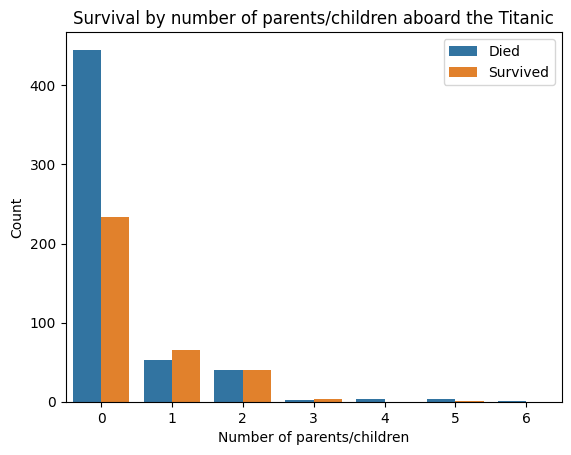

In [65]:
sns.countplot(x='parent_children', hue='survived', data=train_df)
plt.ylabel('Count')
plt.xlabel('Number of parents/children')
plt.title('Survival by number of parents/children aboard the Titanic')
plt.legend(('Died', 'Survived')) 

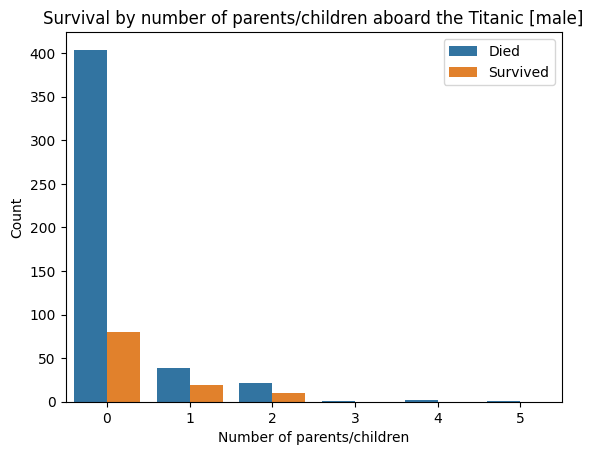

In [66]:
df_male = train_df[train_df.sex=='male']
sns.countplot(x='parent_children', hue='survived', data=df_male)
plt.ylabel('Count')
plt.xlabel('Number of parents/children')
plt.title('Survival by number of parents/children aboard the Titanic [male]')
plt.legend(('Died', 'Survived'), loc='upper right') 

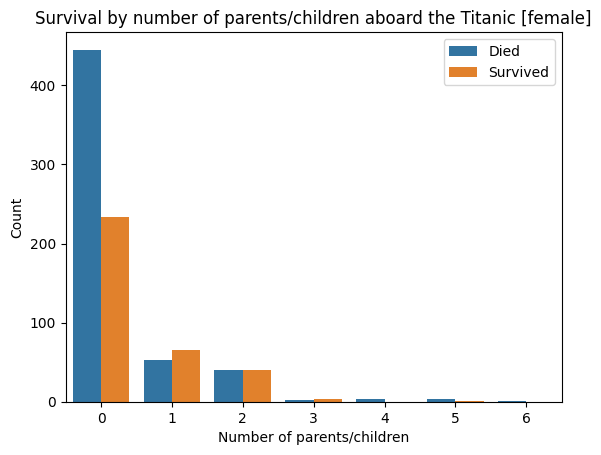

In [67]:
idf_female = train_df[train_df.sex=='female']
sns.countplot(x='parent_children', hue='survived', data=train_df)
plt.ylabel('Count')
plt.xlabel('Number of parents/children')
plt.title('Survival by number of parents/children aboard the Titanic [female]')
plt.legend(('Died', 'Survived'), loc='upper right') 

Text(0.5, 1.0, 'Survival ratio by sex and number of parents/children')

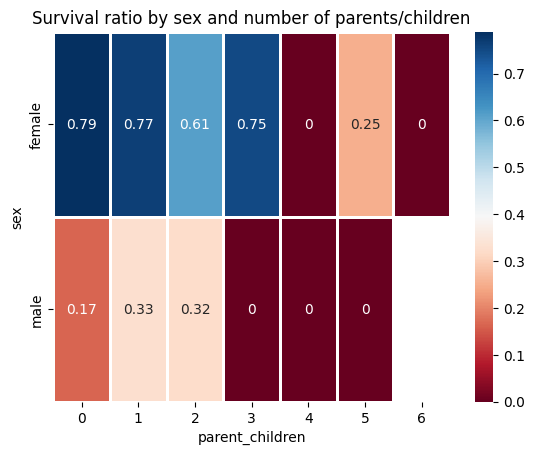

In [68]:
sns.heatmap(train_df.pivot_table(index='sex', columns='parent_children', values='survived'), linewidths=1, cmap='RdBu', linecolor='white', annot=True)
plt.title('Survival ratio by sex and number of parents/children')

Female passengers had the highest survival chance when they travelled alone, whereas childless male passengers had lower chance of survival than those who travelled with their family.

# Data prepareation

In [69]:
train_df.sex.replace({'male':0, 'female':1}, inplace=True)
train_df = pd.concat([train_df, pd.get_dummies(train_df['embarked'], prefix='embarked')], axis=1)
train_df=train_df.drop(['embarked'], axis=1)

In [70]:
train_df.head()

,id,survived,class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,embarked_C,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,False,False,True


In [71]:
test_df.sex.replace({'male':0, 'female':1}, inplace=True)
test_df = pd.concat([test_df, pd.get_dummies(test_df['embarked'], prefix='embarked')], axis=1)
test_df =test_df.drop(['embarked'], axis=1)

In [72]:
test_df.head()

,id,class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,embarked_C,embarked_Q,embarked_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,False,True,False
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,False,False,True


In [73]:
 train_df = train_df.drop(columns=['id', 'name', 'ticket', 'cabin'])
test_df = test_df .drop(columns=['id', 'name', 'ticket', 'cabin'])

<Axes: title={'center': 'Pearson Correlation of Features'}>

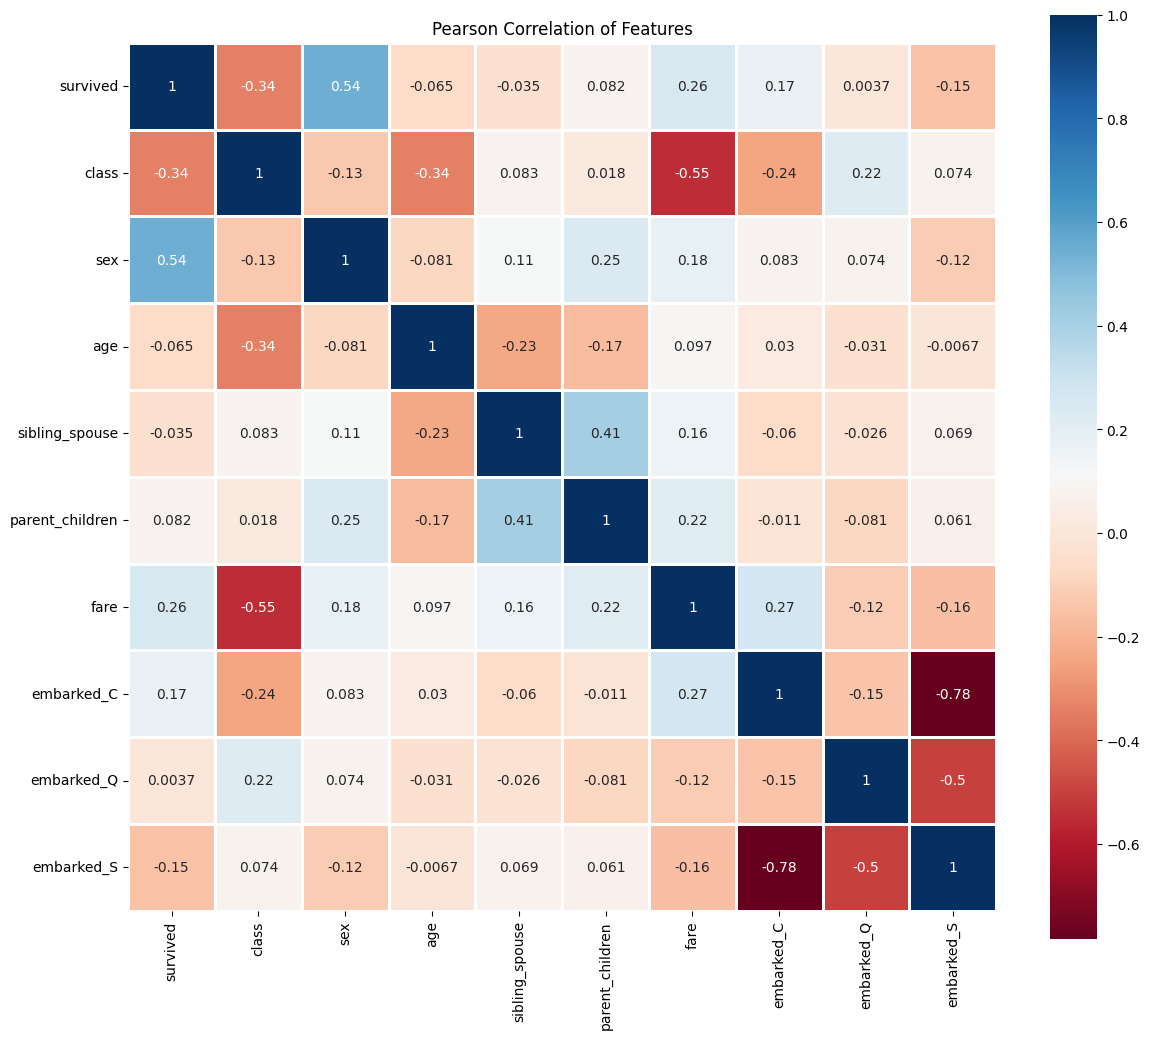

In [74]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features')
sns.heatmap(train_df.corr(), linewidths=1,
           square=True, cmap='RdBu', linecolor='white', annot=True)

In [75]:
#showing the dependent and independent variables
x = train_df.drop('survived', axis=1)
y = train_df['survived']

In [76]:
#splitting the data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

# Modeling the data

Comparing accureancies and metrics to evaluate machine learning algorithms using sklearn accuracy score and classification report

In [77]:
import helpers


In [78]:
!pip install helpers


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Test/ Train set

In [81]:
X = train_df.drop(['survived'], axis=1)
y = train_df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
X_train.head()

,class,sex,age,sibling_spouse,parent_children,fare,embarked_C,embarked_Q,embarked_S
825,3,0,28.0,0,0,6.9500,False,True,False
8,3,1,27.0,0,2,11.1333,False,False,True
689,1,1,15.0,0,1,211.3375,False,False,True
513,1,1,54.0,1,0,59.4000,True,False,False
729,3,1,25.0,1,0,7.9250,False,False,True


In [82]:
y_train.head()

825    0
8      1
689    1
513    1
729    0
Name: survived, dtype: int64

In [83]:
len(X)

891

In [84]:
y_train.mean()

0.3782771535580524

In [87]:
dt = DecisionTreeClassifier(random_state=101)

print('CV score:', cross_val_score(dt, X_train, y_train, cv = 3).mean())

CV score: 0.7890137328339576


In [88]:
rf = RandomForestClassifier(n_estimators=100, random_state=101)

print('CV score:', cross_val_score(rf, X_train, y_train, cv = 3).mean())

CV score: 0.7940074906367042


In [89]:
svm = SVC(gamma='auto',random_state=101)

print('CV score:', cross_val_score(svm, X_train, y_train, cv = 3).mean())

CV score: 0.6803995006242197


In [90]:
knn = KNeighborsClassifier(n_neighbors=1, leaf_size=1000, p=1)

print('CV score:', cross_val_score(knn, X_train, y_train, cv = 3).mean())

CV score: 0.6978776529338327


In [91]:
lr = LogisticRegression(random_state=101, solver='lbfgs', max_iter=500) #Parameters added to disable warnings

print('CV score:', cross_val_score(lr, X_train, y_train, cv = 3).mean())

CV score: 0.7877652933832708


In [92]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}

In [93]:
rf_grid = RandomForestClassifier(random_state=101) # creates a new estimator

# Create the parameter grid based on the results of random search 
param_grid = {'criterion' : ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 5, 10],
              'n_estimators': [100, 300, 500]}

# Instantiate the grid search model (n_jobs = -1 sets to use the max number of processors)
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=3, scoring='precision', n_jobs=-1, verbose=2)

In [94]:
# Fit the grid search to the data and show the best parameters
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'criterion': 'entropy',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [95]:
best_grid = grid_search.best_estimator_
best_grid # Note that it's a classifier

RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                       n_estimators=500, random_state=101)

In [96]:
print('CV score:', cross_val_score(best_grid, X_train, y_train, cv=3).mean())
print('RF Test Score:', best_grid.score(X_test, y_test))

CV score: 0.8239700374531834
RF Test Score: 0.8222222222222222


In [97]:
best_grid.feature_importances_

array([0.11463845, 0.32540016, 0.19269339, 0.04760415, 0.03382725,
       0.25018681, 0.01461847, 0.00643722, 0.01459411])

In [98]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(best_grid.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
sex,0.325
fare,0.250
age,0.193
class,0.115
sibling_spouse,0.048
parent_children,0.034
embarked_C,0.015
embarked_S,0.015
embarked_Q,0.006


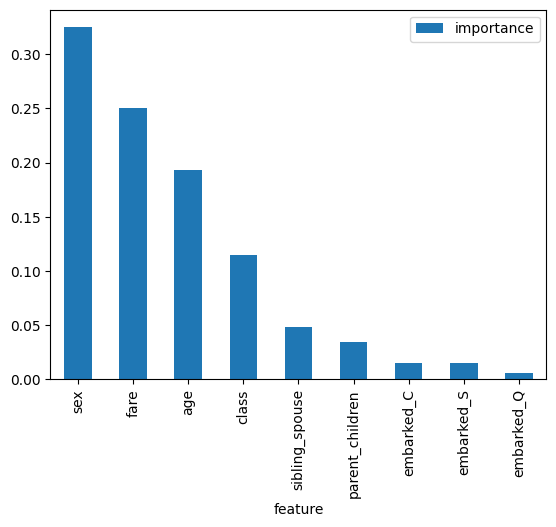

In [99]:
importances.plot.bar()
plt.show()